#NEURAL NETWORK AND BACKPROPAGATION

we want to copy human brain

#single linear perceptron

or : one of them strong (1,0) => worked

and : have both (1,1) -> worked

NAND : both factor not strong

=> 1 , 0 = worked
=> 1, 1 = not worked


XOR : chi ok khi 1 trong 2 tk manh

                                 

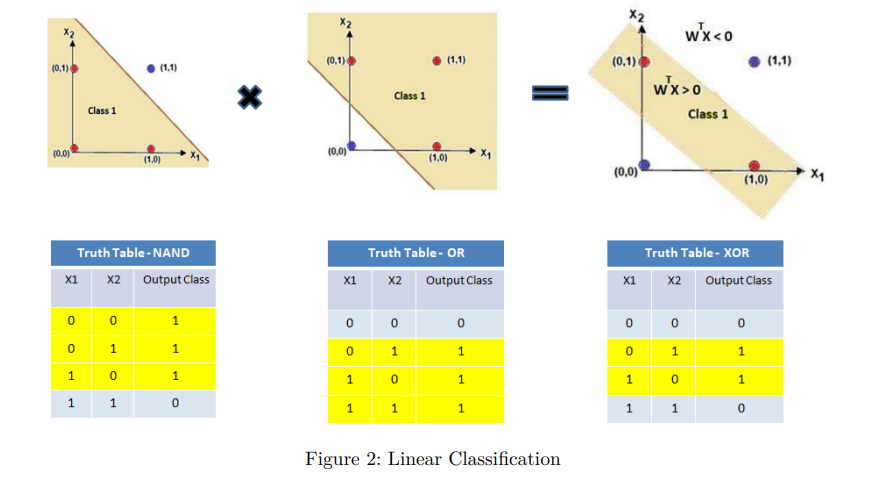

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = True
import warnings
warnings.filterwarnings("ignore")


In [ ]:


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])
y_nand = np.array([1, 1, 1, 0])


#Percepton for binary classification

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron()
model.fit (X,y_and)

print(model.score(X,y_and))

1.0


In [ ]:
model = Perceptron()
model.fit (X,y_xor)

print(model.score(X,y_and))

0.75


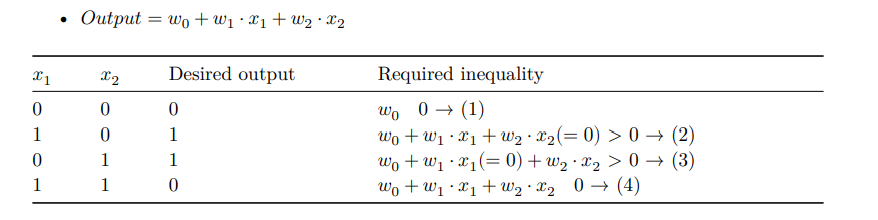

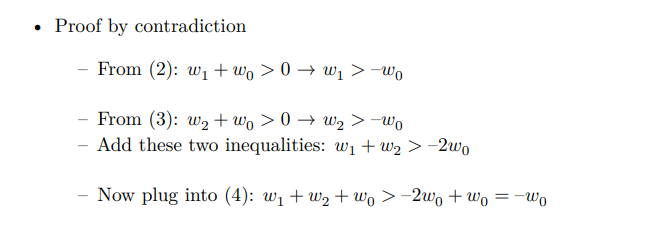

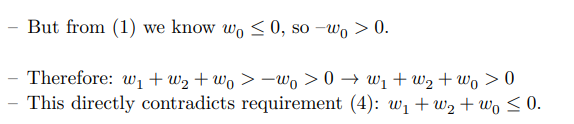

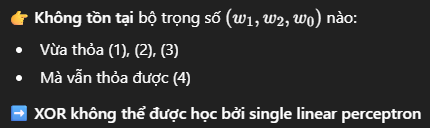

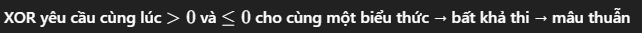

Sigmoid dùng làm activation function, quyết định neuron bật (≈1) hay tắt (≈0) dựa trên đầu vào
𝑧
z.

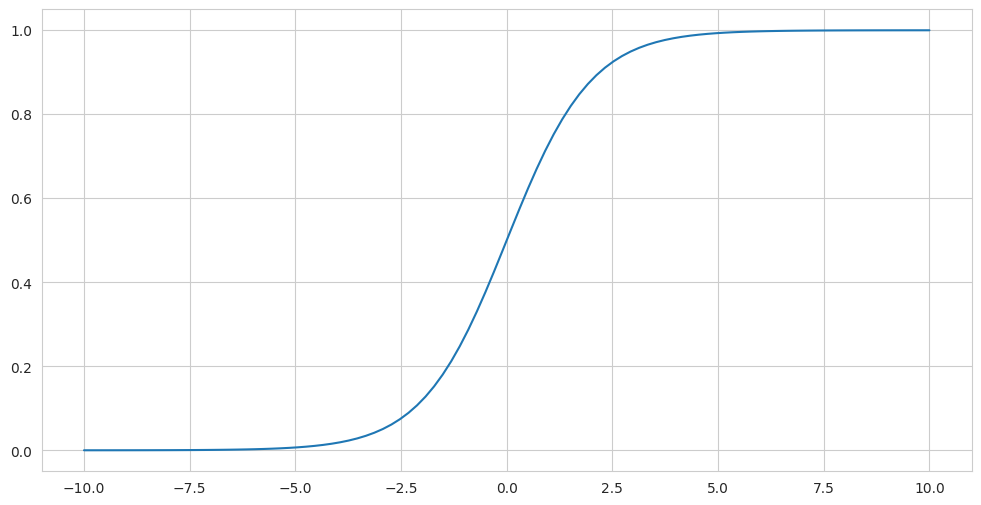

In [ ]:
x = np.linspace(-10,10,100)
sigmoid = lambda z: 1/ (1+np.exp(-z))
plt.plot(x,sigmoid(x));

Perceptron tuyến tính ⇒ chỉ vẽ được 1 đường thẳng

Muốn tách XOR ⇒ phải “bẻ cong” không gian, điểm 1 nằm chéo nhau

⇒ cần non-linear activation (sigmoid, ReLU, …)

# HOW NON LINEARITY TO PERCEPTRON

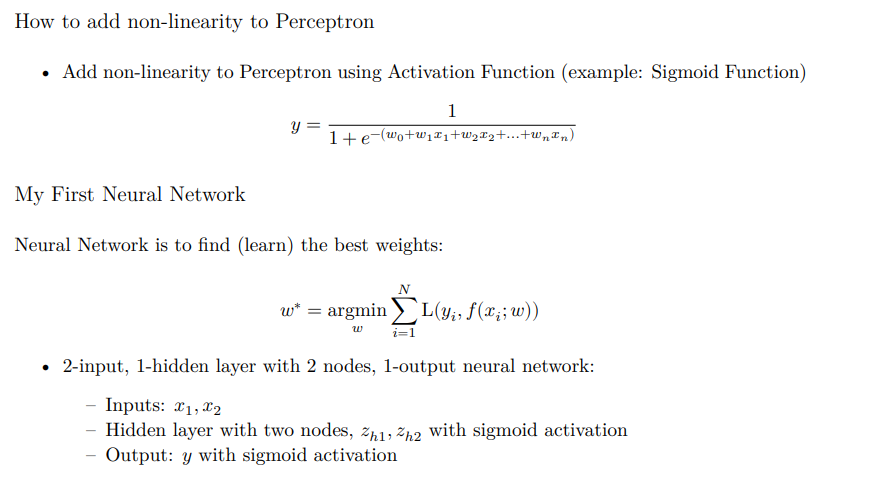

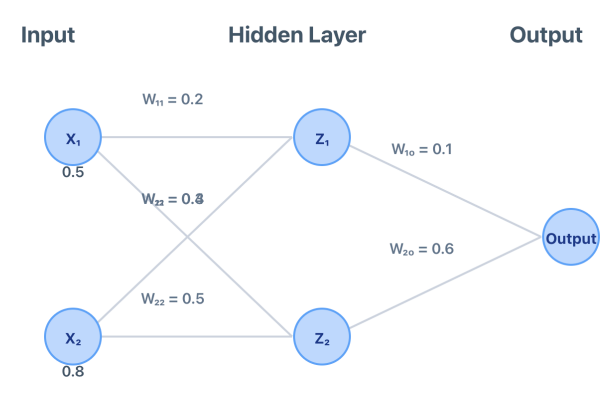

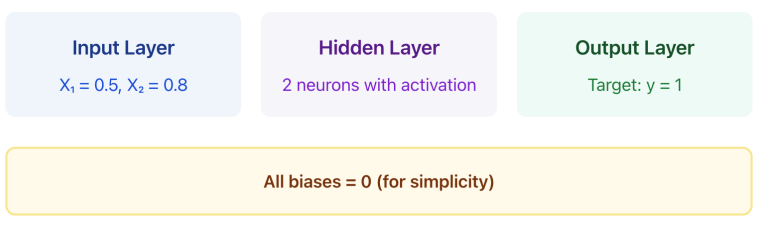

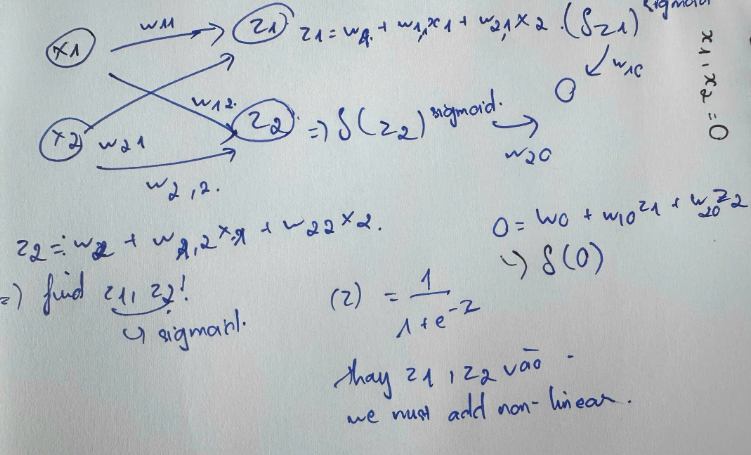

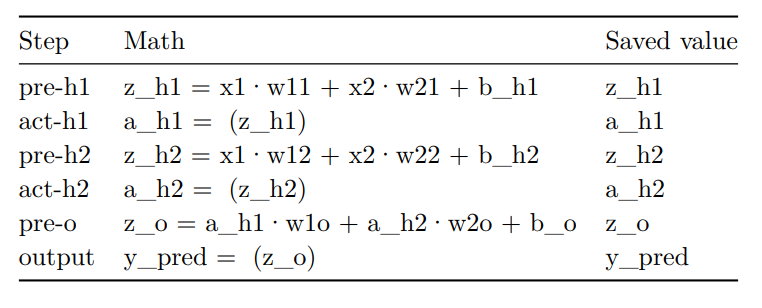

In [ ]:
x1 = 0.5
x2 = 0.8

y_target = 1.0

#weights
w11 = 0.2
w21 = 0.4

w12 = 0.3
w22 = 0.5

w1o = 0.1
w2o = 0.6

b_h1,b_h2,b_o1 = 0.0, 0.0 , 0.0 #bias


In [ ]:
#h1

h1 = b_h1 + w11*x1 + w21*x2
z_h1 = sigmoid(h1)

In [ ]:
h1

0.42000000000000004

In [ ]:
z_h1 = sigmoid(h1)
z_h1

np.float64(0.6034832498647263)

In [ ]:
h2 = b_h1 + w12*x1 + w22*x2
z_h2 = sigmoid(h2)

In [ ]:
print(h2)
print(z_h2)

0.55
0.6341355910108007


#Calculate output layer node 01

In [ ]:
oo = b_o1 + w1o*z_h1 + w2o*z_h2
oo

np.float64(0.44082967959295305)

In [ ]:
y_pred = sigmoid(oo)
y_pred

np.float64(0.6084567090183433)

In [ ]:
#Error: MSE
error = y_target - y_pred

In [ ]:
error

np.float64(0.39154329098165674)

In [ ]:
mse = (error)**2
mse

np.float64(0.15330614871274634)

#BACKRPOPAGATION


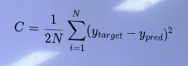

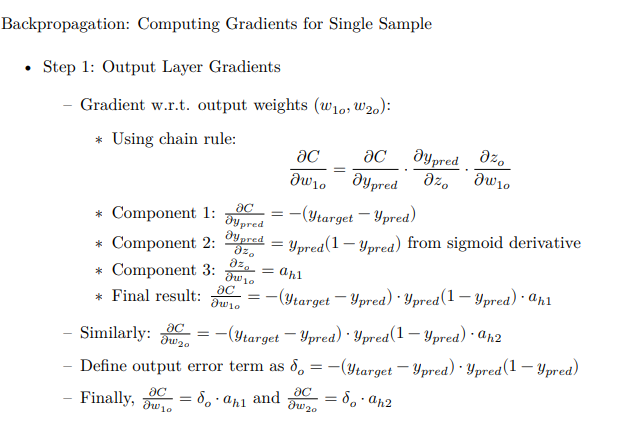

Thay đổi weight ở output layer thì cost thay đổi bao nhiêu
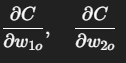


https://chatgpt.com/s/t_696d9bc8fc948191aecb68ce266f1642 (derivative methods)


#DEFINE OUTPUT ERROR TERM


In [ ]:
delta_o = -(y_target-y_pred)*y_pred*(1-y_pred)
delta_o

np.float64(-0.09328015471803436)

In [ ]:
cw1o = delta_o * z_h1
cw2o = delta_o * z_h2

In [ ]:
print(cw1o)
print(cw2o)

-0.05629301091712386
-0.05915226604169965


#HIDEEN LAYER GRADIENTS

In [ ]:
c_w11 = delta_o * w1o * z_h1 * (1-z_h1) * x1
c_w12 = delta_o * w2o * z_h1 * (1-z_h1) * x2


c_w21 = delta_o * w2o * z_h2 * (1-z_h2) * x1
c_w22 = delta_o * w2o * z_h2 * (1-z_h2) * x2
#z_h1 = a_h1

In [ ]:
print(c_w11 ,c_w12,c_w21,c_w22)

-0.0011160560872093717 -0.010714138437209968 -0.006492512656715496 -0.010388020250744794


take

Key Optimization Algorithms

#BACKPROPAGATION ALGORITHM SUMMARY

In [ ]:
learning_rate = 0.1

w1o_new = w1o - learning_rate * cw1o
w2o_new = w2o - learning_rate * cw1o

 #cw1o ,cw20

w11_new = w11 - learning_rate * c_w11
w12_new = w12 - learning_rate * c_w12


w21_new = w21 - learning_rate * c_w21
w22_new = w22 - learning_rate * c_w22

In [ ]:
# the update version of w
w1o_new,w2o_new,w11_new,w12_new,w21_new,w22_new

(np.float64(0.1056293010917124),
 np.float64(0.6056293010917123),
 np.float64(0.20011160560872096),
 np.float64(0.301071413843721),
 np.float64(0.4006492512656716),
 np.float64(0.5010388020250744))

#RETAKE

In [ ]:
# ======================
# 1. INPUT & TARGET
# ======================
x1 = 0.5
x2 = 0.8
y_target = 1.0

# ======================
# 2. UPDATED WEIGHTS (NEW)
# ======================
# input -> hidden
w11 = 0.20011160560872096
w21 = 0.4006492512656716

w12 = 0.301071413843721
w22 = 0.5010388020250744

# hidden -> output
w1o = 0.1056293010917124
w2o = 0.6056293010917123

# ======================
# 3. BIAS (giữ nguyên)
# ======================
b_h1 = 0.0
b_h2 = 0.0
b_o  = 0.0

# ======================
# 4. SIGMOID
# ======================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ======================
# 5. FORWARD PASS (với weight mới)
# ======================
z_h1 = x1 * w11 + x2 * w21 + b_h1
z_h2 = x1 * w12 + x2 * w22 + b_h2

a_h1 = sigmoid(z_h1)
a_h2 = sigmoid(z_h2)

z_o = a_h1 * w1o + a_h2 * w2o + b_o
y_pred = sigmoid(z_o)

# ======================
# 6. COST (MSE)
# ======================
cost = 0.5 * (y_pred - y_target) ** 2

# ======================
# 7. PRINT RESULT
# ======================
print("y_pred (new):", y_pred)
print("cost (new):", cost)


y_pred (new): 0.6101643612200203
cost (new): 0.07598591263149741


the cost must not always be zero

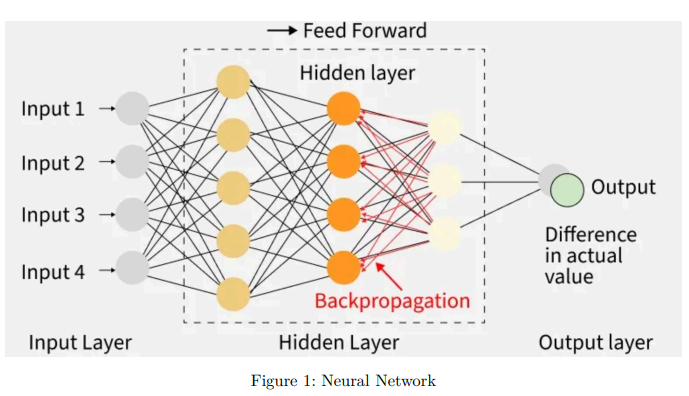

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.27574&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

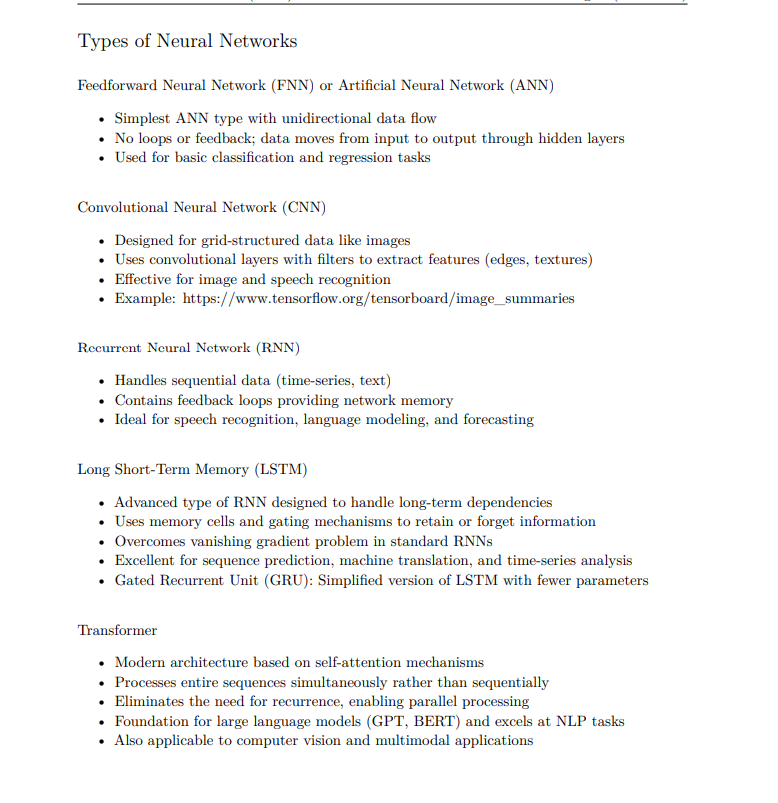

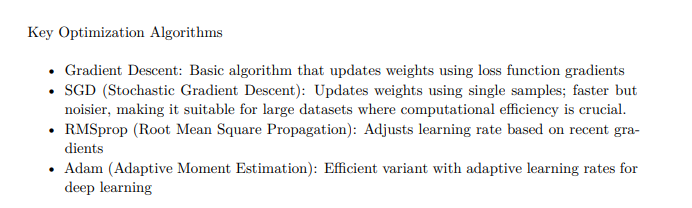

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (12, 8)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Scikit-learn
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
classification_report,
confusion_matrix,
accuracy_score,
ConfusionMatrixDisplay,
r2_score,
mean_squared_error
)

# Tensorflow by Google
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
# Install scikeras to resolve ModuleNotFoundError
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor


# Pytorch by Meta (Facebook AI)
# import torch
# import torch.nn as nn
# import torch.optim as optim

In [ ]:
# Generate dataset
X, y = make_classification( # 0,1
n_samples=1000,
n_features=20,
n_informative=18,
n_redundant=2,
n_classes=2,
random_state=123
)


In [ ]:
X.shape, y.shape

((1000, 20), (1000,))

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 123)

In [ ]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


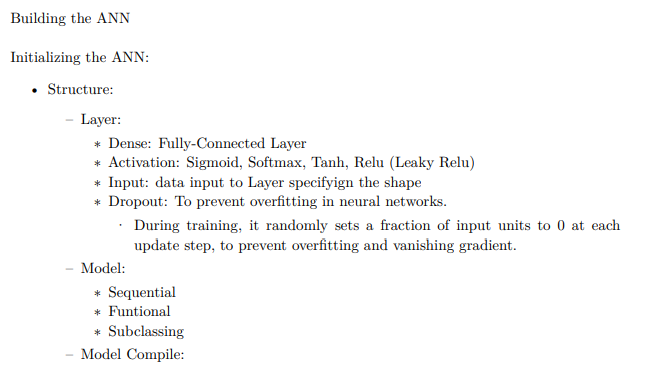

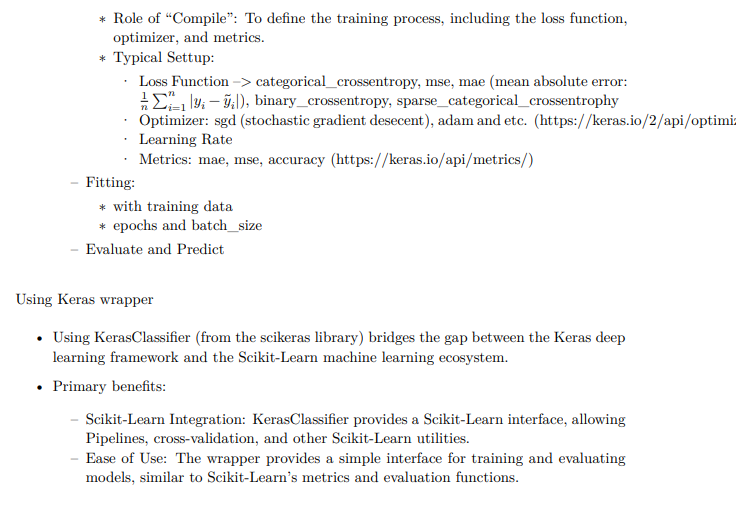

In [ ]:
#set layer first
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train_scaled.shape[1], )), #hidden layer (activation = sigmoid)
    Dense (32, activation = 'relu'), #backpropagation
    Dense (1, activation = 'sigmoid') #output layer (activation = sigmoid)
])


In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01),loss = 'binary_crossentropy',metrics = ['accuracy']) #gradient descent

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Dense (64)
→ nhận 20 input, tạo 64 neuron
→ có 1,344 tham số

Dense (32)
→ nhận 64 đầu vào, tạo 32 neuron
→ 2,080 tham số

Dense (1)
→ output 1 giá trị (thường là xác suất 0/1)
→ 33 tham số

In [ ]:
m1 = model.fit(X_train_scaled, y_train, epochs=100, batch_size= 32, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7601 - loss: 0.4910
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9163 - loss: 0.2172 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1477 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1237 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.0594 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0483
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0297
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0247
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0370
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0699  
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0279 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ac

In [ ]:
# Predict
# Assuming 'scaler' is the StandardScaler object fitted on X_train
# and 'X_test' is the unscaled test data.
y_pred = model.predict(X_test_scaled)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[9.9999928e-01],
       [5.2781786e-07],
       [9.9992895e-01],
       [3.3016287e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.3403675e-02],
       [4.8491267e-14],
       [1.0000000e+00],
       [9.8487133e-01],
       [1.0000000e+00],
       [2.7327060e-12],
       [9.9999440e-01],
       [1.0479507e-06],
       [1.0000000e+00],
       [9.9998653e-01],
       [4.3128350e-07],
       [9.9999988e-01],
       [3.9732686e-07],
       [4.5352012e-19],
       [5.5509497e-10],
       [1.0000000e+00],
       [3.6958087e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0093335e-08],
       [1.0000000e+00],
       [9.9996978e-01],
       [1.2690602e-06],
       [2.2354060e-14],
       [6.2176503e-07],
       [5.5646486e-16],
       [1.0000000e+00],
       [9.1273105e-01],
       [8.1737568e-16],
       [1.0000000e+00],
       [4.7501135e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.1500409e-14],
       [1.000000

In [ ]:
y_pred.round(4),y_test

(array([[1.000e+00],
        [0.000e+00],
        [9.999e-01],
        [3.300e-02],
        [1.000e+00],
        [1.000e+00],
        [9.340e-02],
        [0.000e+00],
        [1.000e+00],
        [9.849e-01],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [0.000e+00],
        [0.000e+00],
        [0.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [1.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [1.000e+00],
        [0.000e+00],
        [0.000e+00],
        [0.000e+00],
        [0.000e+00],
        [1.000e+00],
        [9.127e-01],
        [0.000e+00],
        [1.000e+00],
        [4.800e-03],
        [1.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [0.000e+00],
        [1.000e+00],
        [1.000e+00],
        [9.993e-01],
        [4.561e-01],
        [1.00

In [ ]:
y_pred_class = (y_pred > 0.5).astype(int)

y_pred_class,y_test

(array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],

#Keras wrapper

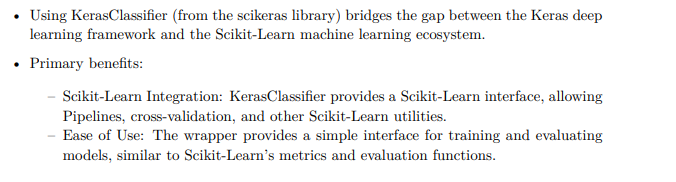

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

ann_kc = KerasClassifier(
    model=create_model,
    epochs=100,
    batch_size=32,
    verbose=1
)

ann_kc.fit(X_train_scaled, y_train)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5317 - loss: 0.6812
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7872 - loss: 0.5432
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8264 - loss: 0.4564
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8823 - loss: 0.3541
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9020 - loss: 0.2966
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9014 - loss: 0.2806
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9116 - loss: 0.2426
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9267 - loss: 0.2125
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.1921
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.1750
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9489 - loss: 0.1653
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasClassifier(
	model=<function create_model at 0x7b94dbdba160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

In [ ]:
#Predict
y_pred_kc = ann_kc.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
y_pred_kc = np.round(y_pred_kc)
y_pred_kc


array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])